# Fashion MNIST

Source of dataset
https://keras.io/api/datasets/fashion_mnist/


# Code

We copied and adapted the code from the provided CNN notebook. We also tried various parameters and pieces of code from the following website: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/


## Librairies and modules import

In [1]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

# example of loading the fashion mnist dataset
from matplotlib import pyplot

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2022-05-12 20:17:53.467358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-12 20:17:53.467370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Dataset load

In [8]:
# Load the dataset
from keras.datasets import fashion_mnist
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check the size
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

## Dataset summary

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


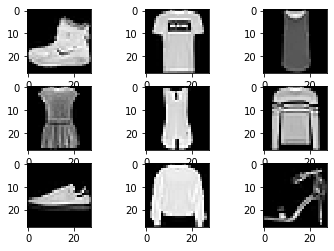

In [9]:
# source: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()



## Utility functions

In [10]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

## Normalization and formatting of dataset

In [11]:
n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


# CNN Model setting

In [23]:
l0 = Input(shape=(height, width, 1), name='l0')
#l1 = Conv2D(9, (5, 5), padding='same', activation='relu', kernel_initializer='he_uniform', name='l1')(l0)
l1 = Conv2D(9, (3, 3), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

#l2 = Conv2D(9, (3,3), padding='same', activation='relu', name='l2')(l1_mp)
#l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

#l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
#l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)



In [31]:
flat = Flatten(name='flat')(l1_mp)

#l4 = Dense(100, activation='relu', name='l4')(flat)
l4 = Dense(100, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4_2)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         90        
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 flat (Flatten)              (None, 1764)              0         
                                                                 
 l4 (Dense)                  (None, 25)                44125     
                                                                 
 l4_2 (Dense)                (None, 25)                650       
                                                                 
 l5 (Dense)                  (None, 10)                260 

In [32]:
batch_size = 4096
n_epoch = 100

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
15/15 [==============================] - 2s 122ms/step - loss: 2.3599 - accuracy: 0.3310 - val_loss: 1.3677 - val_accuracy: 0.5599
Epoch 2/100
15/15 [==============================] - 2s 114ms/step - loss: 1.1067 - accuracy: 0.6577 - val_loss: 0.8864 - val_accuracy: 0.7233
Epoch 3/100
15/15 [==============================] - 2s 115ms/step - loss: 0.7796 - accuracy: 0.7593 - val_loss: 0.7370 - val_accuracy: 0.7436
Epoch 4/100
15/15 [==============================] - 2s 116ms/step - loss: 0.6416 - accuracy: 0.7894 - val_loss: 0.6377 - val_accuracy: 0.7669
Epoch 5/100
15/15 [==============================] - 2s 113ms/step - loss: 0.5749 - accuracy: 0.7999 - val_loss: 0.5476 - val_accuracy: 0.8088
Epoch 6/100
15/15 [==============================] - 2s 117ms/step - loss: 0.5247 - accuracy: 0.8146 - val_loss: 0.5279 - val_accuracy: 0.8037
Epoch 7/100
15/15 [==============================] - 2s 115ms/step - loss: 0.5010 - accuracy: 0.8208 - val_loss: 0.5021 - val_accuracy: 0.8159

Epoch 58/100
15/15 [==============================] - 2s 117ms/step - loss: 0.2848 - accuracy: 0.8966 - val_loss: 0.3219 - val_accuracy: 0.8844
Epoch 59/100
15/15 [==============================] - 2s 118ms/step - loss: 0.2813 - accuracy: 0.8975 - val_loss: 0.3176 - val_accuracy: 0.8856
Epoch 60/100
15/15 [==============================] - 2s 118ms/step - loss: 0.2815 - accuracy: 0.8980 - val_loss: 0.3353 - val_accuracy: 0.8785
Epoch 61/100
15/15 [==============================] - 2s 117ms/step - loss: 0.2781 - accuracy: 0.8986 - val_loss: 0.3266 - val_accuracy: 0.8789
Epoch 62/100
15/15 [==============================] - 2s 118ms/step - loss: 0.2779 - accuracy: 0.8981 - val_loss: 0.3238 - val_accuracy: 0.8797
Epoch 63/100
15/15 [==============================] - 2s 120ms/step - loss: 0.2806 - accuracy: 0.8982 - val_loss: 0.3192 - val_accuracy: 0.8833
Epoch 64/100
15/15 [==============================] - 2s 120ms/step - loss: 0.2724 - accuracy: 0.9010 - val_loss: 0.3192 - val_accuracy:

## Result plots

Test score: 0.29430198669433594
Test accuracy: 0.8930000066757202


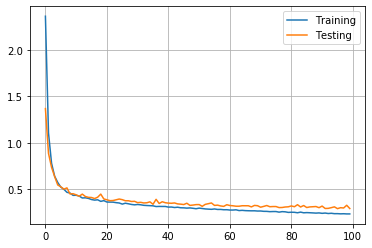

In [33]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

## Confusion Matrix

In [34]:
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
cm = me.confusion_matrix(y_test, pred)

In [35]:
def display_conf_matrix(conf_matrix, classes_labels=['0', '1', '2', '3', '4','5','6','7','8','9']):
    disp = me.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_labels)
    fig, ax = pl.subplots(figsize=(10,10))
    disp.plot(ax=ax)

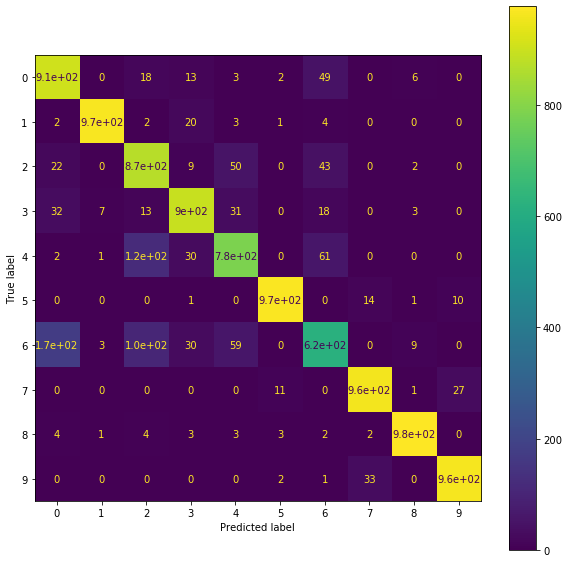

In [36]:
display_conf_matrix(cm, classes_labels=['0', '1', '2', '3', '4','5','6','7','8','9'])

In [37]:
import sklearn
print("F-score")
f1 = sklearn.metrics.f1_score(y_test, pred, average="micro")
print(f1)

F-score
0.893
